<a href="https://colab.research.google.com/github/VishalPrem1994/AiGenPlayground/blob/main/Udemy_Course_1_Basic_Stable_Diffusion_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers

#@title Login to HuggingFace 🤗

#@markdown You need to accept the model license before downloading or using the Stable Diffusion weights. Please, visit the [model card](https://huggingface.co/runwayml/stable-diffusion-v1-5), read the license and tick the checkbox if you agree. You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work.
# https://huggingface.co/settings/tokens
!mkdir -p ~/.huggingface
HUGGINGFACE_TOKEN = "<put your own token from HuggingFace Website>" #@param {type:"string"}
!echo -n "{HUGGINGFACE_TOKEN}" > ~/.huggingface/token

import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display
torch.cuda.empty_cache()
g_cuda = torch.Generator(device='cuda')
model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda"
seed = 70034
g_cuda.manual_seed(seed)

pipe = StableDiffusionPipeline.from_pretrained(model_id,torch_dtype=torch.float16)
pipe = pipe.to(device)

  0%|          | 0/50 [00:00<?, ?it/s]

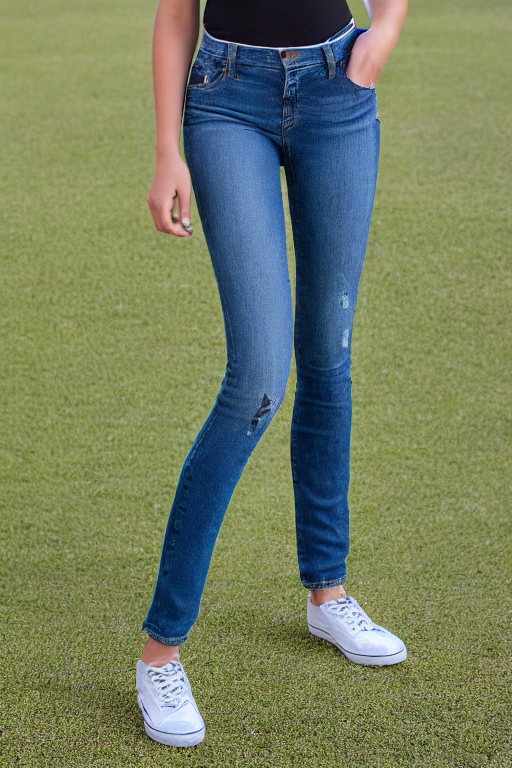

In [8]:
prompt = "18th century "#@param {type:"string"}
negative_prompt = "frame, border, ugly, fat, overweight, (long neck), bad quality, error, blurry, blurred, high contrast, ((dyed hair)), two heads, multiple heads, two faces, multiple faces, multiple people, group of people"
num_samples = 1
guidance_scale = 8
num_inference_steps = 50
height = 768
width = 512
images = pipe(
    prompt,
    height=height,
    width=width,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_samples,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    ).images

for img in images:
    display(img)